# Problem statement
Schuster is a multinational retail company would like to know more about customers payment behavior 
from their past payment data,
Schuster would also like to predict the likelihood of delayed payment using historical data.
This should help the collection department to prioritize their work on customers accordingly and save time and money and also brand value by following up only with the right customers.

In [2]:
# Imporinting needed libraries
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [3]:
past_data=pd.read_csv("Received_Payments_Data.csv")

In [4]:
past_data.shape

(93937, 16)

In [5]:
past_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DOC_NO',
       'RECEIPT_DATE', 'CLASS', 'CURRENCY_CODE', 'Local Amount', 'USD Amount',
       'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE'],
      dtype='object')

In [6]:
past_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [7]:
past_data.isna().mean()

RECEIPT_METHOD           0.000000
CUSTOMER_NAME            0.000000
CUSTOMER_NUMBER          0.000000
RECEIPT_DOC_NO           0.000309
RECEIPT_DATE             0.000000
CLASS                    0.000000
CURRENCY_CODE            0.000000
Local Amount             0.000000
USD Amount               0.000000
INVOICE_ALLOCATED        0.000000
INVOICE_CREATION_DATE    0.000000
DUE_DATE                 0.000000
PAYMENT_TERM             0.000000
INVOICE_CLASS            0.000000
INVOICE_CURRENCY_CODE    0.000000
INVOICE_TYPE             0.000000
dtype: float64

In [8]:
# With happy to see clean data lets check categorical values
past_data=past_data.drop("RECEIPT_DOC_NO", axis=1)

In [9]:
past_data[['Local Amount','USD Amount']]

Local Amount    USD Amount
0         370990.92  101018.63040
1         183750.00   48990.21133
2         157500.00   41991.60971
3         157500.00   41991.60971
4         157500.00   41991.60971
...             ...           ...
93932      59914.50   59914.50000
93933      59914.50   59914.50000
93934      59914.50   59914.50000
93935      23574.33   23574.33000
93936       1443.43    1443.43000

[93937 rows x 2 columns]

In [10]:
past_data=past_data.drop("Local Amount", axis=1)

In [11]:
past_data["DUE_DATE"]=pd.to_datetime(past_data.DUE_DATE , format="%d-%b-%y")

In [12]:
past_data['RECEIPT_DATE']=pd.to_datetime(past_data.RECEIPT_DATE, format="%d-%b-%y")

In [13]:
past_data['is_late_payment']=past_data.RECEIPT_DATE>past_data.DUE_DATE

In [14]:
past_data=past_data.drop("RECEIPT_DATE",axis=1)

In [15]:
past_data['is_late_payment']=past_data.is_late_payment.map({True:1,False:0})

- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

In [17]:
late_payers=past_data.groupby("CUSTOMER_NUMBER")['is_late_payment'].mean()
late_payers=late_payers.reset_index()
late_payers.columns=['CUSTOMER_NUMBER','TOTAL late INVOICES']
late_payers

CUSTOMER_NUMBER  TOTAL late INVOICES
0                1044             0.719912
1                1076             0.472000
2                1146             0.833333
3                1154             0.659574
4                1192             1.000000
...               ...                  ...
1049            52762             0.000000
1050            52800             0.000000
1051            52802             1.000000
1052            52820             0.000000
1053            52940             0.000000

[1054 rows x 2 columns]

In [18]:
monetory=past_data.groupby("CUSTOMER_NUMBER")['USD Amount'].sum()
monetory=monetory.reset_index()
monetory.columns=['CUSTOMER_NUMBER','monetory']

In [19]:
pd.set_option('display.float_format', '{:,.0f}'.format)

In [20]:
frequency=past_data.groupby("CUSTOMER_NUMBER")['INVOICE_ALLOCATED'].count()
frequency=frequency.reset_index()
frequency.columns=['CUSTOMER_NUMBER','frequency']

In [21]:
recency=past_data.groupby("CUSTOMER_NUMBER")['DUE_DATE'].max()
recency=recency.reset_index()
recency.columns=['CUSTOMER_NUMBER','recency']
recency.head()

CUSTOMER_NUMBER    recency
0             1044 2021-08-30
1             1076 2021-06-25
2             1146 2021-05-30
3             1154 2021-08-30
4             1192 2021-04-30

In [22]:
grouped_df=pd.merge(monetory,frequency, on="CUSTOMER_NUMBER", how='inner')

In [23]:
pd.merge(past_data,late_payers, on="CUSTOMER_NUMBER", how='left')

RECEIPT_METHOD CUSTOMER_NAME  CUSTOMER_NUMBER CLASS CURRENCY_CODE  \
0               WIRE     C EA Corp            37403   PMT           USD   
1               WIRE     RADW Corp             4003   PMT           SAR   
2               WIRE     RADW Corp             4003   PMT           SAR   
3               WIRE     FARO Corp             1409   PMT           SAR   
4               WIRE     RADW Corp             4003   PMT           SAR   
...              ...           ...              ...   ...           ...   
93932           WIRE     PEAR Corp            21144   PMT           USD   
93933           WIRE     PEAR Corp            21144   PMT           USD   
93934           WIRE     PEAR Corp            21144   PMT           USD   
93935           WIRE     NAMS Corp            21145   PMT           AED   
93936         CHEQUE     SENS Corp            48486   PMT           AED   

       USD Amount INVOICE_ALLOCATED INVOICE_CREATION_DATE   DUE_DATE  \
0         101,019       14200000001              2-Nov-20 2020-12-30   
1          48,990       99200000043             29-Dec-20 2021-01-28   
2          41,992       99210000003             30-Jan-21 2021-03-01   
3          41,992       99200000038             15-Dec-20 2021-01-14   
4          41,992       99200000039             15-Dec-20 2021-01-14   
...           ...               ...                   ...        ...   
93932      59,914         2.842E+11             28-Dec-20 2020-12-28   
93933      59,914         2.842E+11             28-Dec-20 2020-12-28   
93934      59,914         2.842E+11             28-Dec-20 2020-12-28   
93935      23,574         2.842E+11             24-Jan-21 2021-03-24   
93936       1,443         2.842E+11             16-Feb-21 2021-03-30   

                PAYMENT_TERM INVOICE_CLASS INVOICE_CURRENCY_CODE INVOICE_TYPE  \
0           30 Days from EOM           INV                   AED    Non Goods   
1      30 Days from Inv Date           INV                   SAR    Non Goods   
2      30 Days from Inv Date           INV                   SAR    Non Goods   
3      30 Days from Inv Date           INV                   SAR    Non Goods   
4      30 Days from Inv Date           INV                   SAR    Non Goods   
...                      ...           ...                   ...          ...   
93932              Immediate            CM                   USD        Goods   
93933              Immediate            CM                   USD        Goods   
93934              Immediate            CM                   USD        Goods   
93935  60 Days from Inv Date           INV                   AED        Goods   
93936       30 Days from EOM           INV                   AED        Goods   

       is_late_payment  TOTAL late INVOICES  
0                    1                    1  
1                    1                    0  
2                    0                    0  
3                    1                    1  
4                    1                    0  
...                ...                  ...  
93932                1                    1  
93933                1                    1  
93934                1                    1  
93935                1                    1  
93936                1                    1  

[93937 rows x 15 columns]

In [24]:
past_data.INVOICE_TYPE.value_counts()

INVOICE_TYPE
Goods        66715
Non Goods    27222
Name: count, dtype: int64

In [25]:
max_date = max(recency.recency)
max_date

Timestamp('2022-05-09 00:00:00')

In [26]:
recency['diff']=max_date-recency.recency
recency=recency.drop('recency',axis=1)
recency

CUSTOMER_NUMBER     diff
0                1044 252 days
1                1076 318 days
2                1146 344 days
3                1154 252 days
4                1192 374 days
...               ...      ...
1049            52762 252 days
1050            52800 279 days
1051            52802 321 days
1052            52820 293 days
1053            52940 313 days

[1054 rows x 2 columns]

In [27]:
recency.columns=['CUSTOMER_NUMBER','recency']

In [28]:
grouped_df=pd.merge(grouped_df,recency, on="CUSTOMER_NUMBER", how='inner')

In [29]:
past_data.CLASS.value_counts()

CLASS
PMT    93937
Name: count, dtype: int64

In [30]:
# Lets see what else we can make use of
past_data=past_data.drop(["RECEIPT_METHOD","CUSTOMER_NAME",'CLASS'], axis=1)

In [31]:
past_data.PAYMENT_TERM.value_counts()

PAYMENT_TERM
60 Days from Inv Date                                      19870
30 Days from Inv Date                                      14672
60 Days from EOM                                           12518
30 Days from EOM                                           11306
15 Days from EOM                                            7544
Immediate Payment                                           5474
Immediate                                                   5261
90 Days from EOM                                            3893
45 Days from Inv Date                                       3550
45 Days from EOM                                            3509
90 Days from Inv Date                                       2211
100% Adv Payment                                            1241
25 DAYS FROM EOM                                             462
Cash on Delivery                                             418
15 Days from Inv Date                                        356
45 DAYS + EO

In [32]:
grouped_df1=pd.DataFrame()

In [33]:
Q1 = grouped_df.monetory.quantile(0.05)
Q3 = grouped_df.monetory.quantile(0.95)
IQR = Q3 - Q1
grouped_df=grouped_df[(grouped_df.monetory >= Q1 - 1.5*IQR) & (grouped_df.monetory <= Q3 + 1.5*IQR)]




In [34]:
grouped_df['recency'] = grouped_df['recency'].dt.days

In [35]:
# outlier treatment for recency
Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.recency >= Q1 - 1.5*IQR) & (grouped_df.recency <= Q3 + 1.5*IQR)]



In [36]:
# outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)]

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [38]:
scaler=StandardScaler()

In [39]:
scaler=scaler.fit_transform(grouped_df)


In [40]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(scaler)

KMeans(max_iter=50, n_clusters=4)

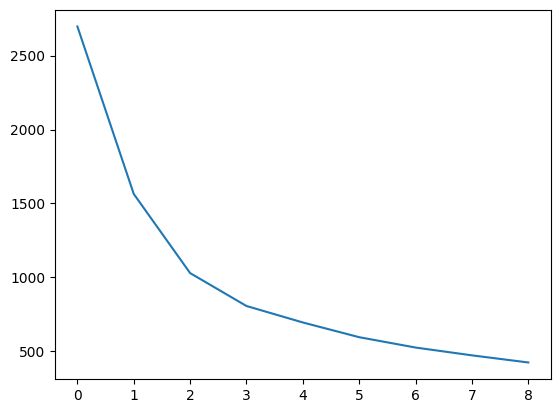

In [41]:
# elbow-curve/SSD
ssd = []
range_n_clusters = range(2,20,2)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaler)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [42]:
# 6 seems to be optimal number of cluster
# silhouette analysis
range_n_clusters = range(2,20,2)

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaler)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaler, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.6130258024702675
For n_clusters=4, the silhouette score is 0.43212027455311025
For n_clusters=6, the silhouette score is 0.366236812427496
For n_clusters=8, the silhouette score is 0.3563267380649065
For n_clusters=10, the silhouette score is 0.35285334376611366
For n_clusters=12, the silhouette score is 0.36265667324843653
For n_clusters=14, the silhouette score is 0.35148109739241756
For n_clusters=16, the silhouette score is 0.3580601279947574
For n_clusters=18, the silhouette score is 0.3673101106559196


In [43]:
kmeans = KMeans(n_clusters=6, max_iter=50)
kmeans.fit(scaler)

KMeans(max_iter=50, n_clusters=6)

In [44]:
kmeans.labels_

array([5, 1, 2, ..., 0, 0, 0], dtype=int32)

In [45]:
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

CUSTOMER_NUMBER   monetory  frequency  recency  cluster_id
1             1076  4,049,838        125      318           5
2             1146  1,117,161         60      344           1
3             1154 40,422,734         94      252           2
4             1192     83,455         27      374           1
5             1198 14,073,034        102      313           5

<Axes: xlabel='cluster_id', ylabel='monetory'>

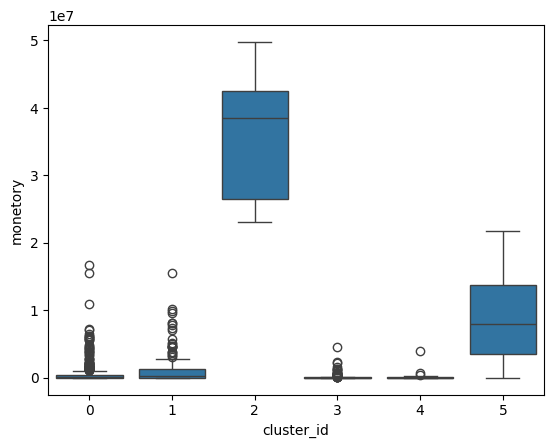

In [173]:
sns.boxplot(x='cluster_id', y='monetory', data=grouped_df)

<Axes: xlabel='cluster_id', ylabel='recency'>

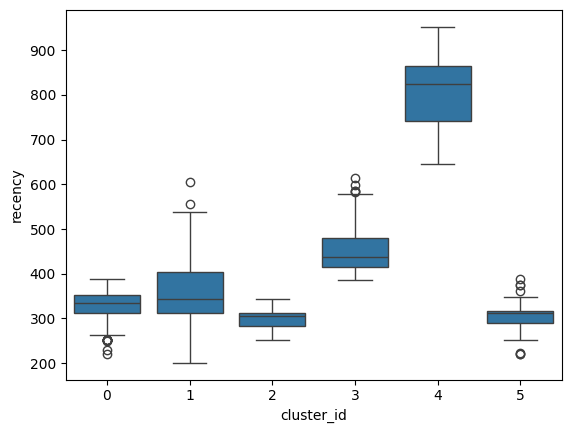

In [47]:
sns.boxplot(x='cluster_id', y='recency', data=grouped_df)

<Axes: xlabel='cluster_id', ylabel='frequency'>

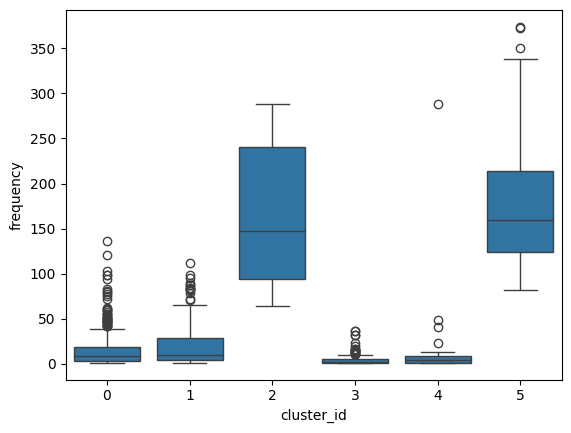

In [48]:
sns.boxplot(x='cluster_id', y='frequency', data=grouped_df)

# This is how we segmented the customers however to build model we need to dive deeper and check individual scenarios/ invoices rather than direct customers


In [50]:
#COming back to past data
past_data.head()

CUSTOMER_NUMBER CURRENCY_CODE  USD Amount INVOICE_ALLOCATED  \
0            37403           USD     101,019       14200000001   
1             4003           SAR      48,990       99200000043   
2             4003           SAR      41,992       99210000003   
3             1409           SAR      41,992       99200000038   
4             4003           SAR      41,992       99200000039   

  INVOICE_CREATION_DATE   DUE_DATE           PAYMENT_TERM INVOICE_CLASS  \
0              2-Nov-20 2020-12-30       30 Days from EOM           INV   
1             29-Dec-20 2021-01-28  30 Days from Inv Date           INV   
2             30-Jan-21 2021-03-01  30 Days from Inv Date           INV   
3             15-Dec-20 2021-01-14  30 Days from Inv Date           INV   
4             15-Dec-20 2021-01-14  30 Days from Inv Date           INV   

  INVOICE_CURRENCY_CODE INVOICE_TYPE  is_late_payment  
0                   AED    Non Goods                1  
1                   SAR    Non Goods                1  
2                   SAR    Non Goods                0  
3                   SAR    Non Goods                1  
4                   SAR    Non Goods                1

In [51]:
past_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CUSTOMER_NUMBER        93937 non-null  int64         
 1   CURRENCY_CODE          93937 non-null  object        
 2   USD Amount             93937 non-null  float64       
 3   INVOICE_ALLOCATED      93937 non-null  object        
 4   INVOICE_CREATION_DATE  93937 non-null  object        
 5   DUE_DATE               93937 non-null  datetime64[ns]
 6   PAYMENT_TERM           93937 non-null  object        
 7   INVOICE_CLASS          93937 non-null  object        
 8   INVOICE_CURRENCY_CODE  93937 non-null  object        
 9   INVOICE_TYPE           93937 non-null  object        
 10  is_late_payment        93937 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 7.9+ MB


In [52]:
past_data.INVOICE_CLASS.value_counts(normalize=True)

INVOICE_CLASS
INV   1
CM    0
DM    0
Name: proportion, dtype: float64

In [53]:
past_data=past_data.drop("INVOICE_CLASS",axis=1)

<Axes: >

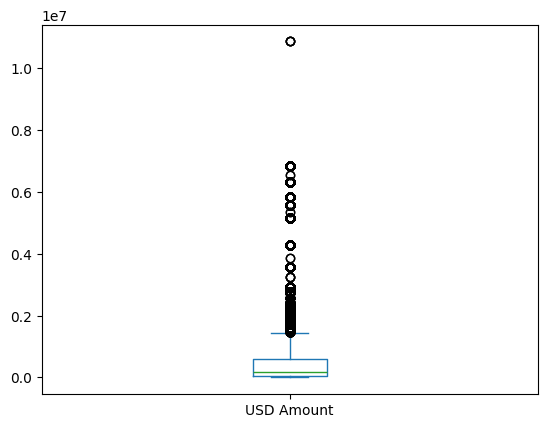

In [54]:
past_data['USD Amount'].plot(kind='box')

In [55]:
past_data[past_data['USD Amount']<0]

Empty DataFrame
Columns: [CUSTOMER_NUMBER, CURRENCY_CODE, USD Amount, INVOICE_ALLOCATED, INVOICE_CREATION_DATE, DUE_DATE, PAYMENT_TERM, INVOICE_CURRENCY_CODE, INVOICE_TYPE, is_late_payment]
Index: []

In [56]:
past_data['USD Amount'].min()

0.0

In [57]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [58]:
categorical_cols=['INVOICE_ALLOCATED','CURRENCY_CODE','INVOICE_CURRENCY_CODE','PAYMENT_TERM',"INVOICE_TYPE"]

In [59]:
past_data[categorical_cols]=past_data[categorical_cols].apply(le.fit_transform)

In [60]:
past_data['days_span']=past_data.DUE_DATE-pd.to_datetime(past_data.INVOICE_CREATION_DATE,format="%d-%b-%y")

In [61]:
past_data['days_span']=past_data.days_span.dt.days

In [62]:
past_data=past_data.drop(['INVOICE_CREATION_DATE','DUE_DATE','CURRENCY_CODE','INVOICE_ALLOCATED','INVOICE_TYPE'],axis=1)

In [63]:
# Putting feature variable to X
X=past_data.drop('is_late_payment',axis=1)
y=past_data.is_late_payment

# train test split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=40)

In [66]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((70452, 5), (70452,), (23485, 5), (23485,))

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [69]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

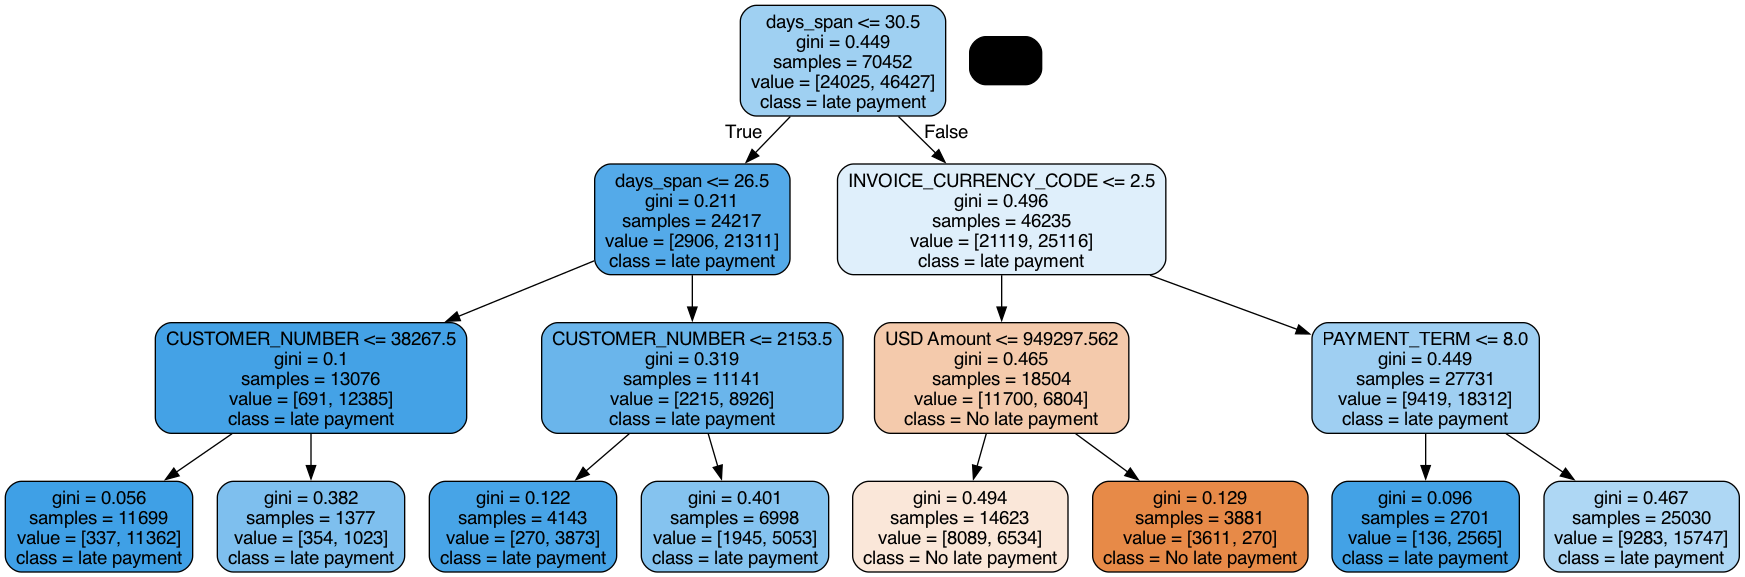

In [70]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No late payment', "late payment"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [71]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [73]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7284818032135355


array([[11700, 12325],
       [ 6804, 39623]])

In [74]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.7303810943155206


array([[ 3824,  4110],
       [ 2222, 13329]])

# Accuracy score is pretty close but lets check with grid search.


In [76]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [77]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_leaf': [ 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [80]:
#Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [81]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [82]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0              0             0                0               0   
1              0             0                0               0   
2              0             0                0               0   
3              0             0                0               0   
4              0             0                0               0   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                     10   
1            gini               2                     20   
2            gini               2                     50   
3            gini               2                    100   
4            gini               3                     10   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...                  1   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...                  1   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...                  1   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...                  1   
4  {'criterion': 'gini', 'max_depth': 3, 'min_sam...                  1   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0                  1                  1                  1                1   
1                  1                  1                  1                1   
2                  1                  1                  1                1   
3                  1                  1                  1                1   
4                  1                  1                  1                1   

   std_test_score  rank_test_score  
0               0               17  
1               0               17  
2               0               17  
3               0               17  
4               0               17

# Grid search approach for hyper parameter tuning

In [83]:
# Lets check the best estimator
dt_best = grid_search.best_estimator_

In [84]:
dt_best.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)>

In [85]:
evaluate_model(dt_best)

Train Accuracy : 0.8444188951342758
Train Confusion Matrix:
[[16264  7761]
 [ 3200 43227]]
--------------------------------------------------
Test Accuracy : 0.8367042793272301
Test Confusion Matrix:
[[ 5237  2697]
 [ 1138 14413]]


In [86]:
from sklearn.metrics import classification_report

In [87]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.66      0.73      7934
           1       0.84      0.93      0.88     15551

    accuracy                           0.84     23485
   macro avg       0.83      0.79      0.81     23485
weighted avg       0.84      0.84      0.83     23485



dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.556741 to fit



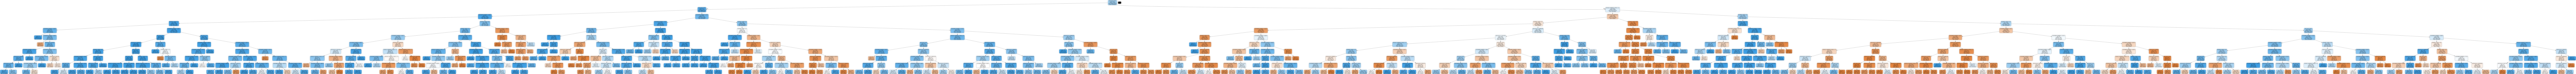

In [88]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

In [89]:
X_test.columns

Index(['CUSTOMER_NUMBER', 'USD Amount', 'PAYMENT_TERM',
       'INVOICE_CURRENCY_CODE', 'days_span'],
      dtype='object')

In [90]:
future_data=pd.read_csv("open_invoice_data.csv", encoding ="latin1")
future_data.columns

Index(['AS_OF_DATE', 'Customer Type', 'Customer_Name', 'Customer Account No',
       'Transaction Number', 'Transaction Date', 'Payment Term', 'Due Date',
       'Transaction Currency', 'Local Amount', 'Transaction Class', 'AGE',
       'USD Amount', 'INV_CREATION_DATE'],
      dtype='object')

In [91]:
future_data=future_data.drop(['AS_OF_DATE','Customer Type','Transaction Number','Transaction Date','AGE','Local Amount','Customer_Name','Transaction Class'], axis=1)

In [92]:
future_data.rename(columns={'Customer Account No': 'CUSTOMER_NUMBER'}, inplace=True)

In [93]:
future_data['INV_CREATION_DATE']=pd.to_datetime(future_data.INV_CREATION_DATE, format="%m/%d/%Y %H:%M")

In [94]:
future_data['Due Date']=pd.to_datetime(future_data["Due Date"], format="%d/%m/%Y")

In [95]:
future_data['days_span']=(future_data['Due Date']-future_data.INV_CREATION_DATE).dt.days

In [96]:
future_data=future_data.drop(['Due Date','INV_CREATION_DATE',], axis=1)

In [97]:
future_data.rename(columns={'Payment Term': 'PAYMENT_TERM'}, inplace=True)

In [98]:
future_data.rename(columns={'Transaction Currency': 'INVOICE_CURRENCY_CODE'}, inplace=True)

In [99]:
future_data.head()

CUSTOMER_NUMBER           PAYMENT_TERM INVOICE_CURRENCY_CODE USD Amount  \
0           49,144              Immediate                   AED     -3,088   
1           23,152  30 Days from Inv Date                   USD      2,000   
2           23,152  30 Days from Inv Date                   USD      2,000   
3           23,312  15 Days from Inv Date                   AED      2,415   
4            7,530       30 Days from EOM                   AED      3,800   

   days_span  
0         -1  
1         29  
2         29  
3         13  
4         57

In [111]:
future_data= future_data[~future_data["USD Amount"].str.startswith('-')]

In [131]:
future_data["USD Amount"]=future_data["USD Amount"].str.replace(',', '').astype('int')

In [161]:
X.PAYMENT_TERM.head()

0     9
1    10
2    10
3    10
4    10
Name: PAYMENT_TERM, dtype: int64

In [163]:
future_data.PAYMENT_TERM.apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

1       -1
2       -1
3       -1
4       -1
5       -1
        ..
88197   -1
88198   -1
88201   -1
88202   -1
88203   -1
Name: PAYMENT_TERM, Length: 79780, dtype: int64

In [135]:
new_columns_order=X.columns

In [137]:
future_data=future_data[new_columns_order]

In [167]:
dt_best.predict(future_data)

ValueError: could not convert string to float: '30 Days from Inv Date'